# Forest Cover Type Dataset 
## - Tree types found in the Roosevelt National Forest in Colorado
### About Dataset
Context:
</br>
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

Content:
</br>
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

Acknowledgement:
</br>
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.

Questions to be addressed:
</br>
1. Can you build a model that predicts what types of trees grow in an area based on the surrounding characteristics? 
2. What kinds of trees are most common in the Roosevelt National Forest?
3. Which tree types can grow in more diverse environments? Are there certain tree types that are sensitive to an environmental factor, such as elevation or soil type?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2]:
forest = pd.read_csv('covtype.csv')

In [3]:
forest

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


# Inspecting the Data

In [4]:
forest.shape

(581012, 55)

In [5]:
forest.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
forest.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [8]:
forest.duplicated().sum()

0

# Visualization

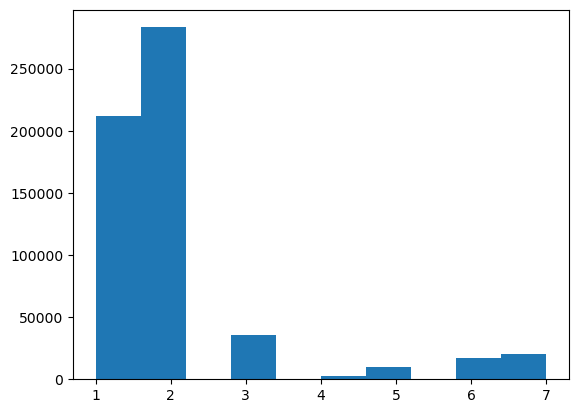

In [9]:
# Type 2 (Lodgepole Pine) is the most common type of trees in Roosevelt National Forest
plt.hist(forest['Cover_Type']);

<AxesSubplot:>

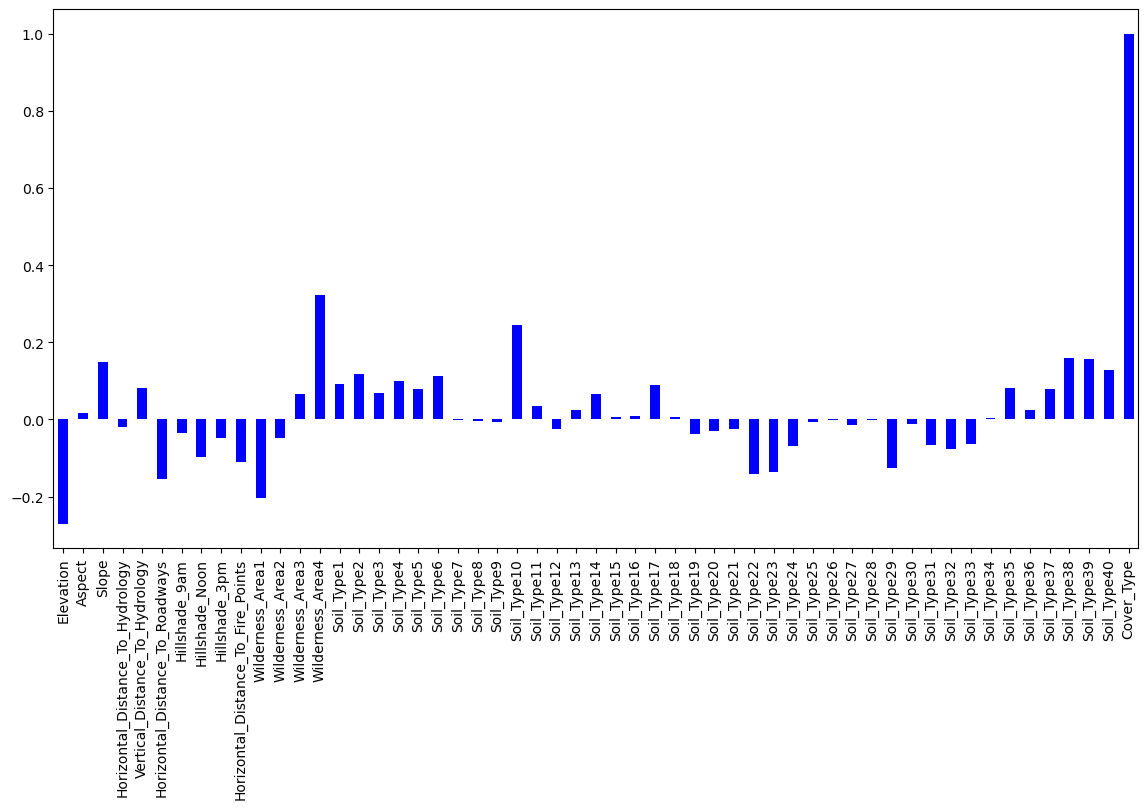

In [10]:
#Find out the variables that have the most correlations with cover type so as to see if we need to select features to predict the tree types
forest.corr()["Cover_Type"].plot(y='Cover_Type',figsize=(14,7),kind="bar", color=['blue'])

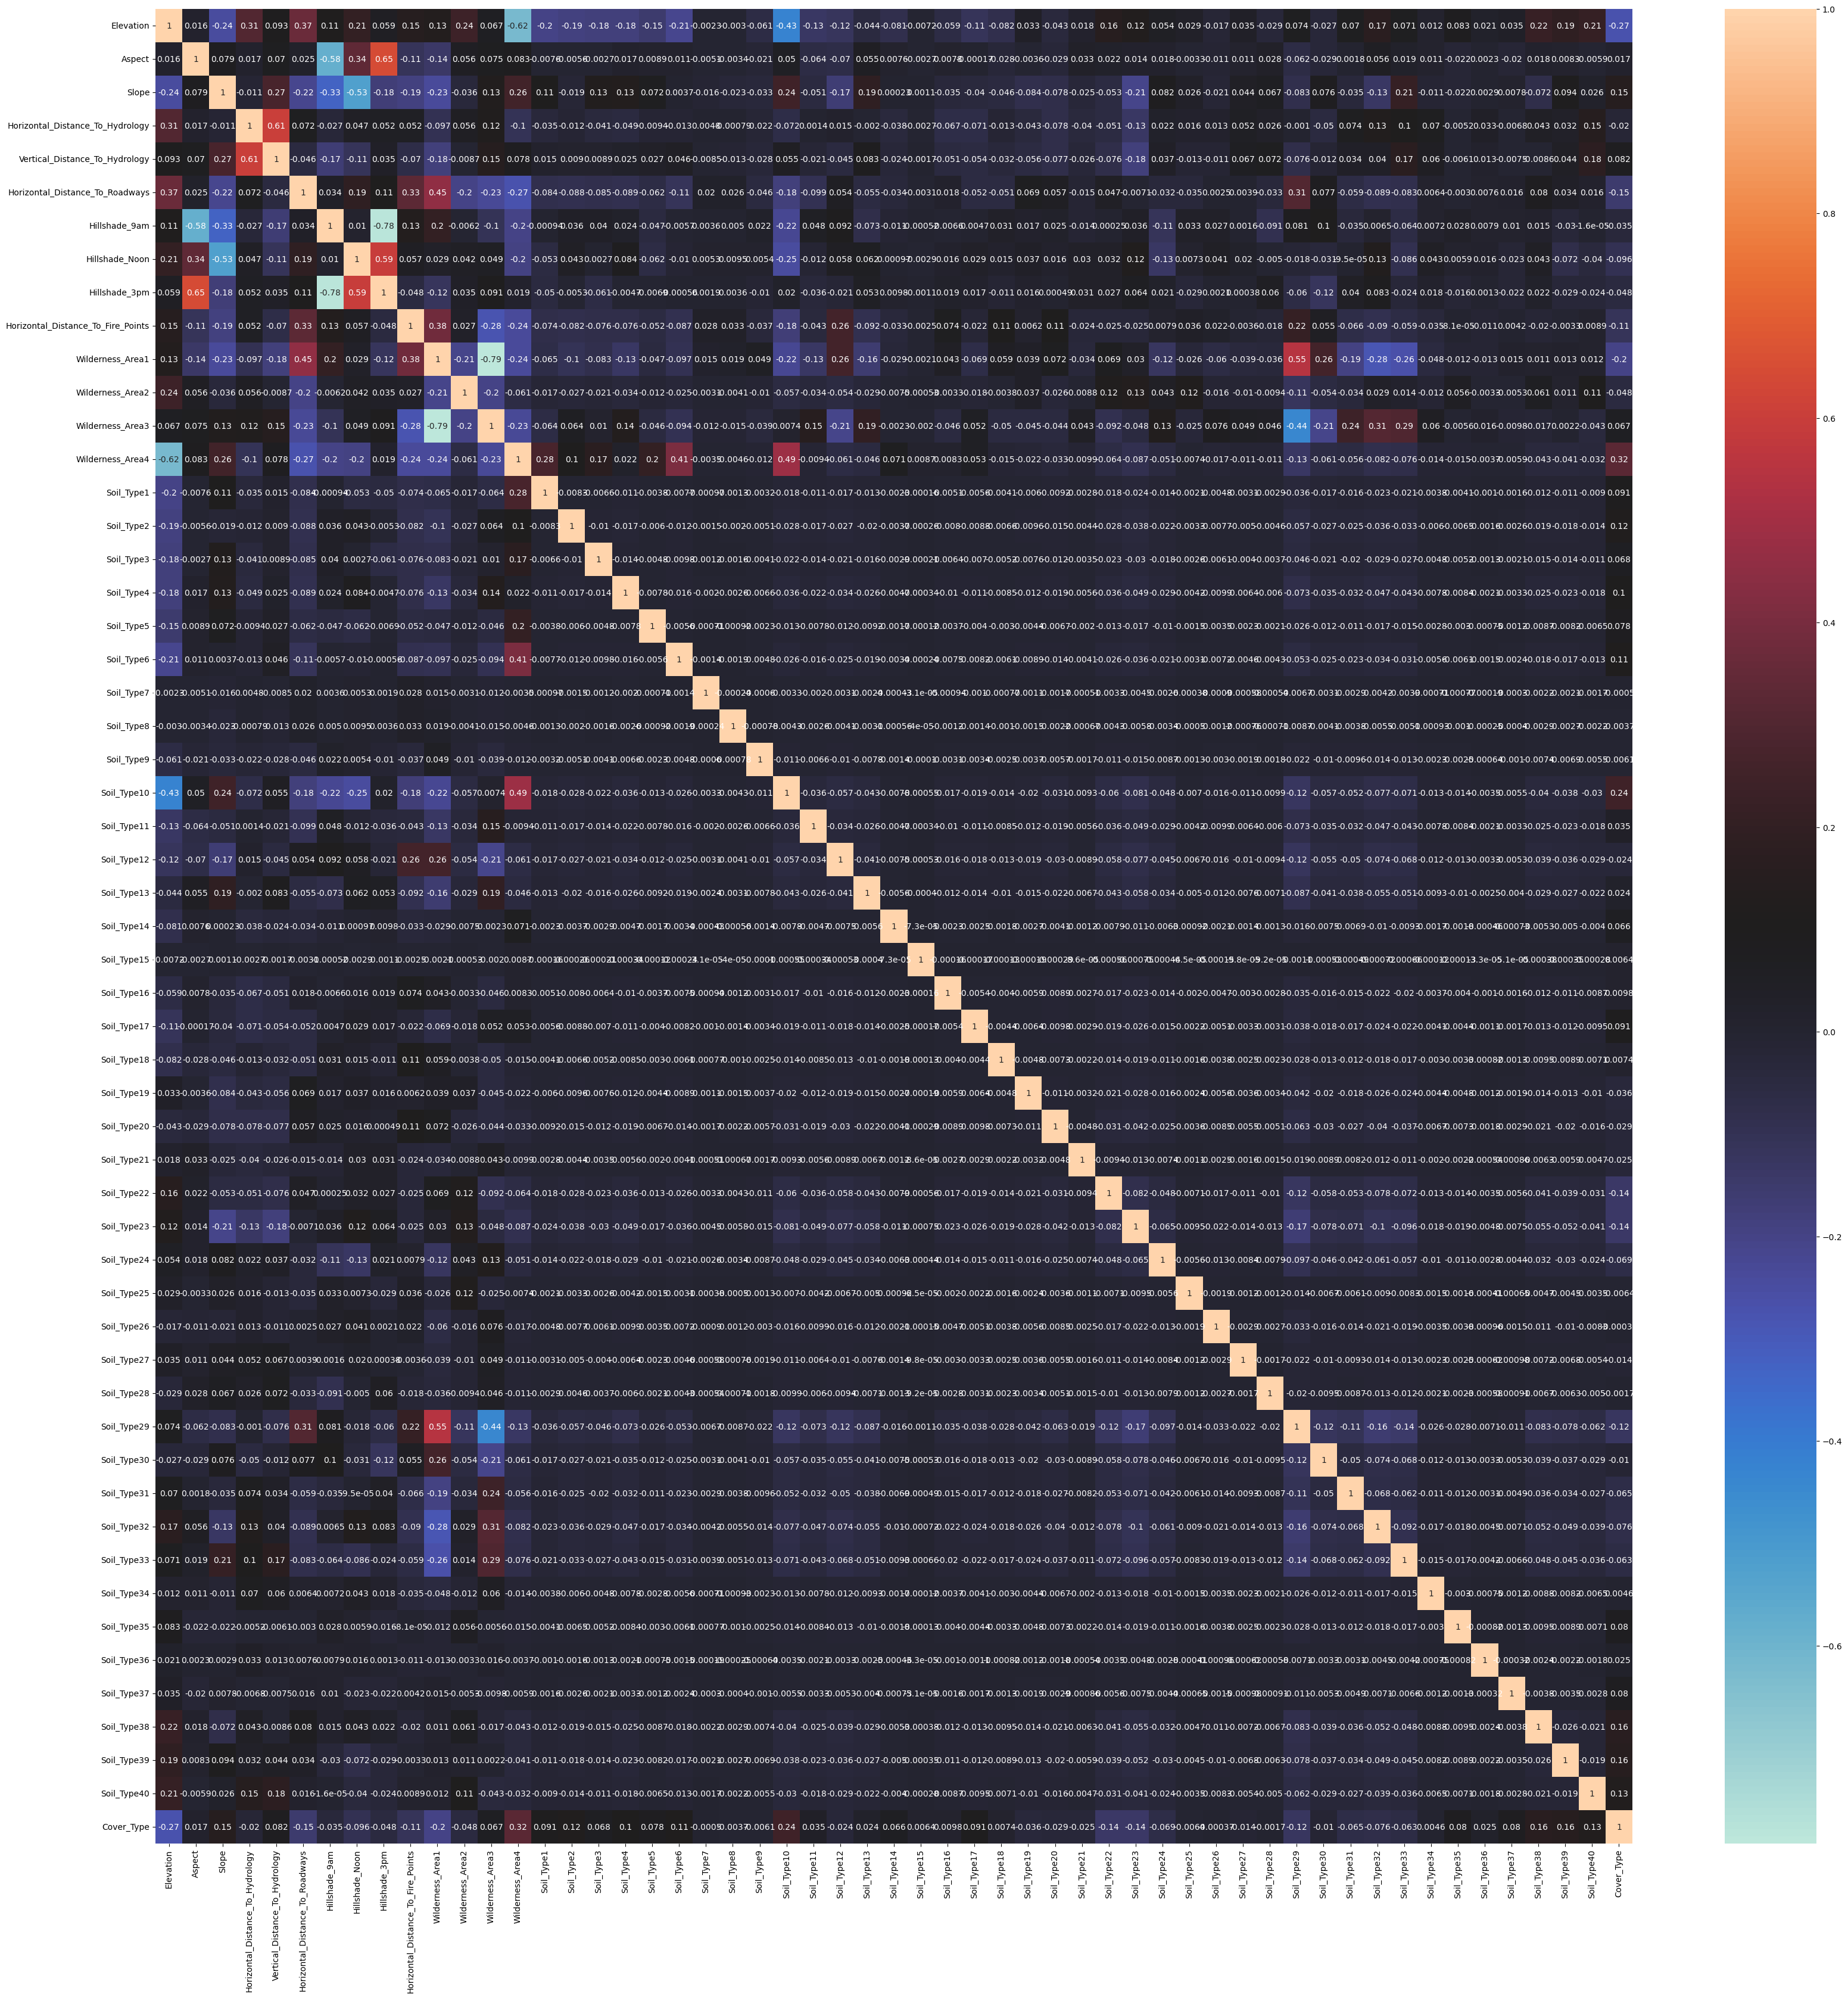

In [11]:
plt.figure(figsize=(40,40))
sns.heatmap(forest.corr(), annot=True, linecolor = 'black', cmap='icefire');

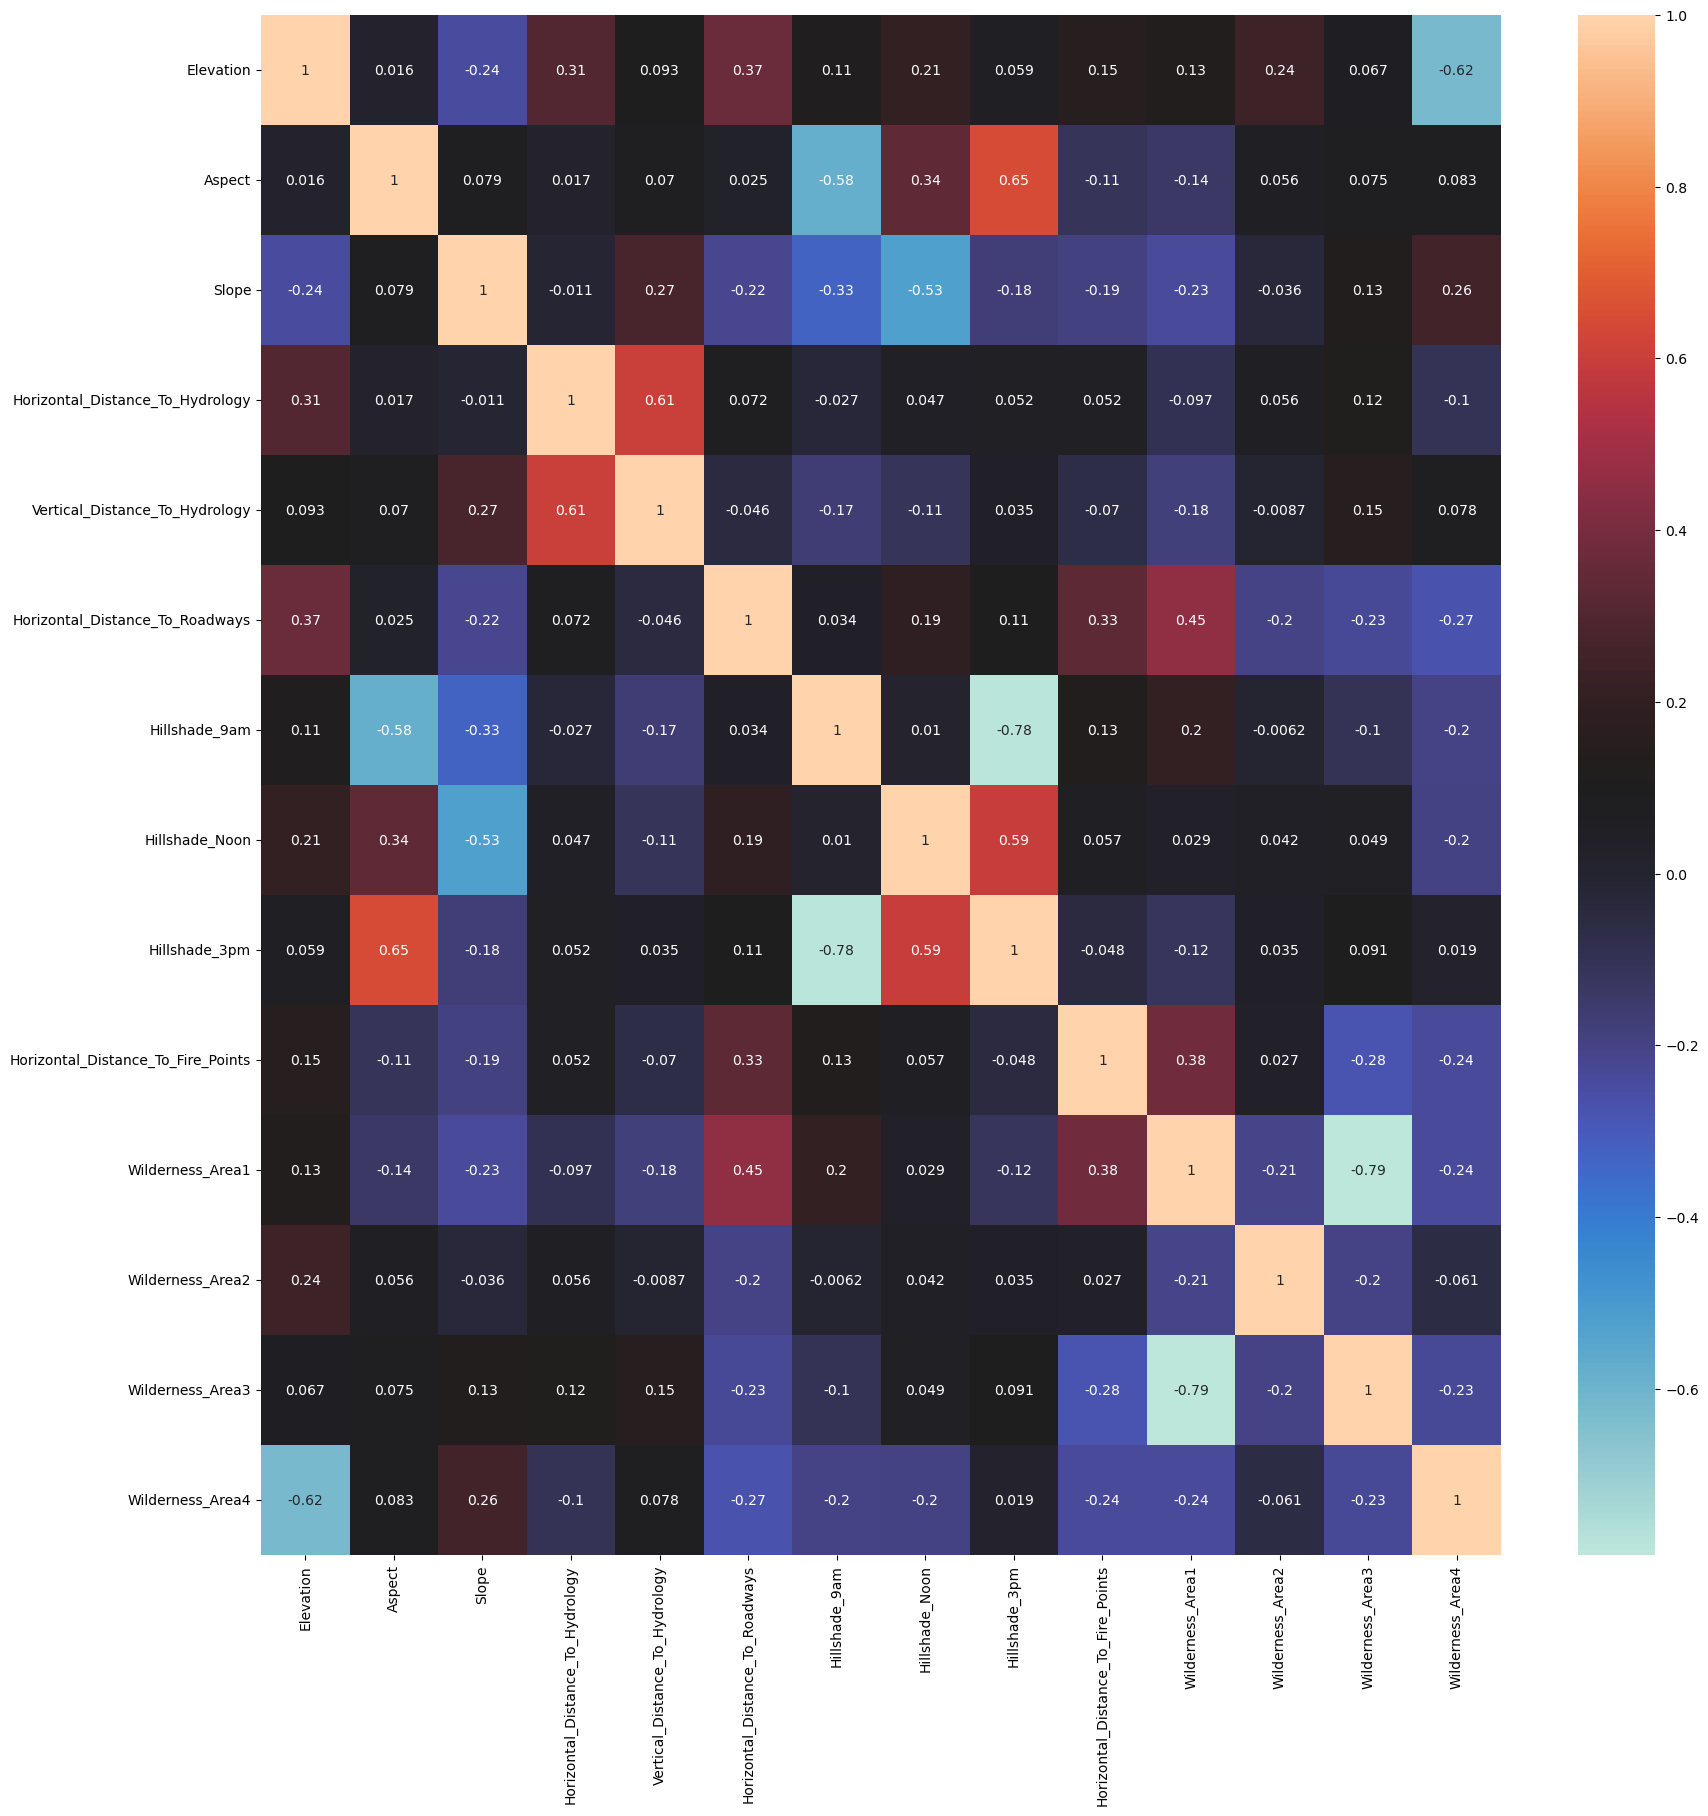

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(forest.iloc[0:, 0:14].corr(), annot=True, linecolor = 'black', cmap='icefire');

<AxesSubplot:xlabel='Cover_Type', ylabel='Aspect'>

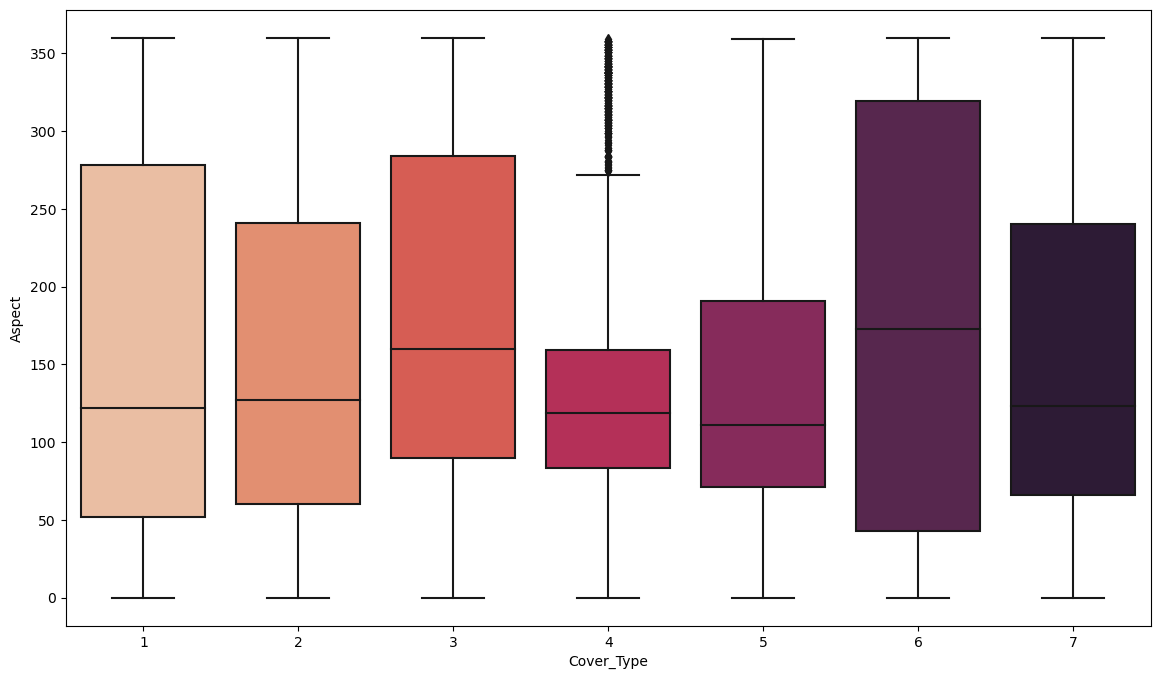

In [13]:
plt.figure(figsize=(14,8))
sns.boxplot(x = 'Cover_Type', y = 'Aspect', data = forest, palette = 'rocket_r')

# Douglas-fir has a normal distribution in terms of aspects.
# While Cottonwood/Willow has a left-skewed distrubtion, where a significant number of outliers in aspects, ranging from 270-350. 

/var/folders/w0/sh538wjn68n6sktngvrggw480000gn/T/ipykernel_41092/2580481819.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'Cover_Type', y = 'Elevation', data = forest, palette = 'crest');


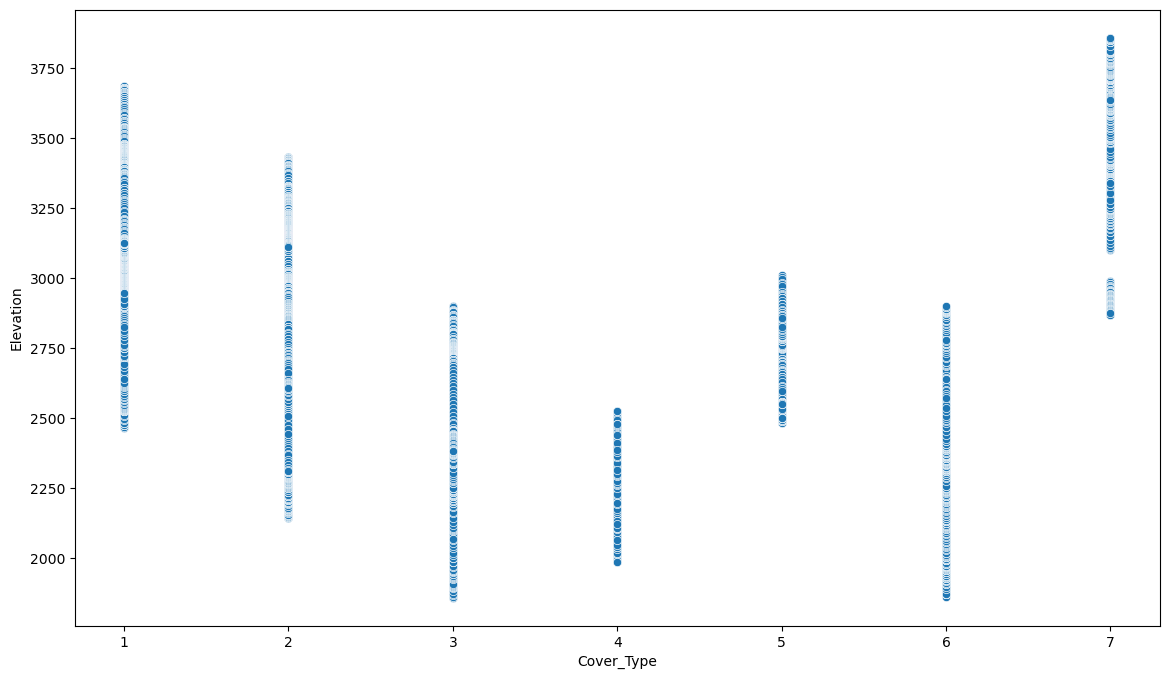

In [14]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'Cover_Type', y = 'Elevation', data = forest, palette = 'crest');

# Krummholz tends to grow at a higher height, while Cottonwood/Willow tends to grow at lower height.

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

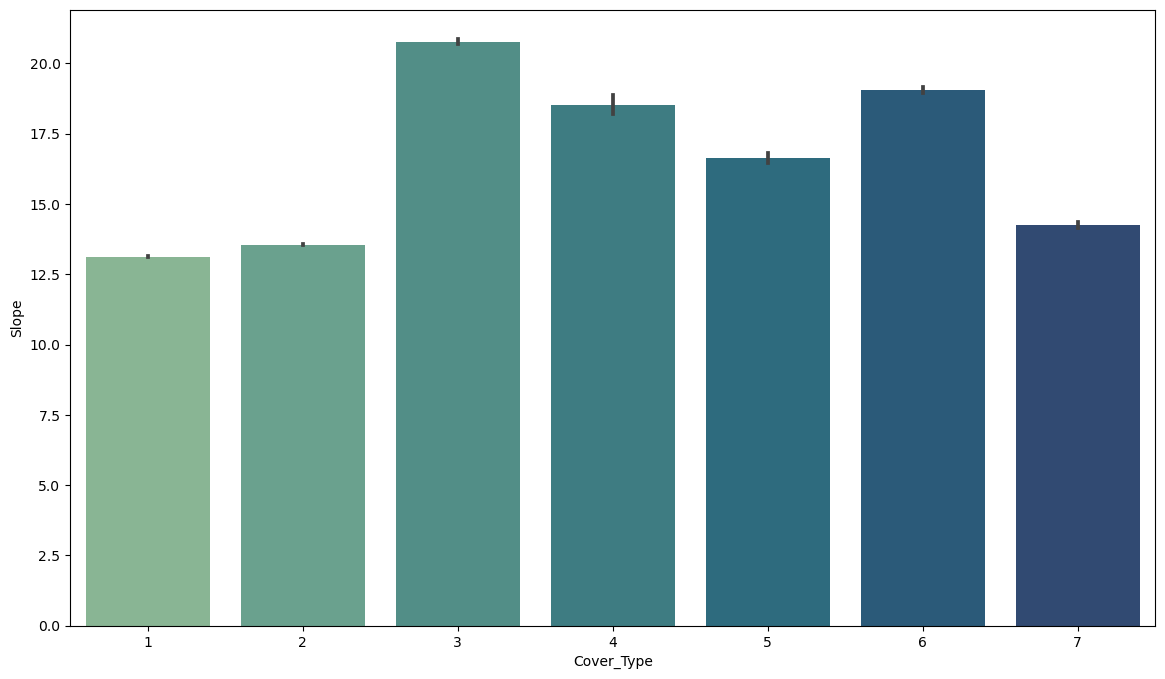

In [15]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Cover_Type', y = 'Slope', data = forest, palette = 'crest')
# Ponderosa Pine tends to grow at steeper soil, while Spruce/Fir tends to grow at flatter soil.

# Train Test Split

In [16]:
X = forest.drop(["Cover_Type"], axis=1)
y = forest["Cover_Type"]

In [17]:
X.shape

(581012, 54)

In [18]:
y.shape

(581012,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forest Classifier

In [20]:
rfc = RandomForestClassifier(n_estimators = 200, criterion='gini', random_state=42,
                             class_weight='balanced',n_jobs=2, bootstrap=True)

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=2,
                       random_state=42)

# Model Evaluation

In [22]:
pred = rfc.predict(X_test)
pred

array([1, 2, 2, ..., 3, 1, 6])

In [23]:
print("Training Score:",rfc.score(X_train,y_train))
print("Test Score:",rfc.score(X_test,y_test))

Training Score: 1.0
Test Score: 0.9548511906810875


In [24]:
print("accuracy_score: " + str(accuracy_score(y_test, pred)))
print("\n")
print("classification_report:\n",classification_report(y_test,pred))
print("\n")
print("confusion_matrix:\n ",confusion_matrix(y_test,pred))

accuracy_score: 0.9548511906810875


classification_report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     53006
           2       0.95      0.97      0.96     70776
           3       0.94      0.96      0.95      8909
           4       0.91      0.86      0.89       651
           5       0.94      0.79      0.85      2473
           6       0.93      0.89      0.91      4373
           7       0.98      0.95      0.96      5065

    accuracy                           0.95    145253
   macro avg       0.94      0.91      0.93    145253
weighted avg       0.95      0.95      0.95    145253



confusion_matrix:
  [[49951  2934     1     0    13     6   101]
 [ 1470 68950   136     0   105    93    22]
 [    3   129  8577    28     6   166     0]
 [    0     0    76   562     0    13     0]
 [   29   456    32     0  1942    14     0]
 [    3   154   303    26     3  3884     0]
 [  204    31     0     0     1     0  4829]]


/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


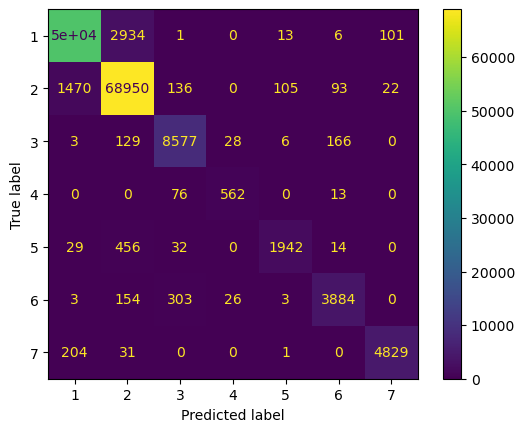

In [25]:
metrics.plot_confusion_matrix(rfc, X_test, y_test);

# Random Forest -  (A plain model)

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [27]:
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer

imputer = make_column_transformer((KNNImputer(),forest.iloc[0:, 0:14]), remainder='passthrough', verbose_feature_names_out=False)

X = forest.drop(["Cover_Type"], axis=1)
y = forest["Cover_Type"]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [29]:
rf = RandomForestClassifier()

In [30]:
et = ExtraTreesClassifier()

# Model Evaluation - Random Forest Classifier (Plain model)

In [42]:
#cross_val_score(rf, X_train, y_train, cv=2).mean()

cross_val_score(et, X_train, y_train, cv=3).mean()

rf_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 2, 3, 4, 5],
    'max_features': [2, 3, 4]
}

gs = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)

gs.score(X_train, y_train)

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
rf.score(X_test, y_test)

0.9531162867548346

/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


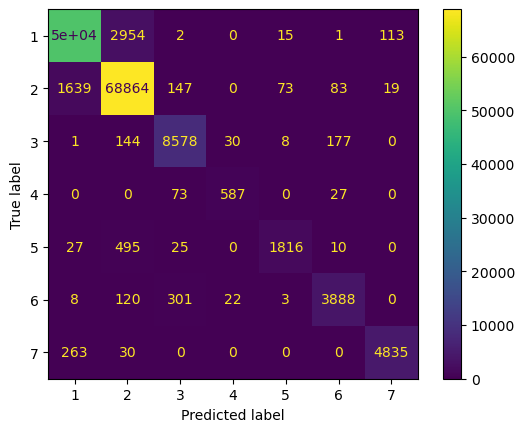

In [41]:
metrics.plot_confusion_matrix(rf, X_test, y_test);

# Model Evaluation - ExtraTreesClassifier

In [43]:
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [44]:
et.score(X_test, y_test)

0.9508306196773905

/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


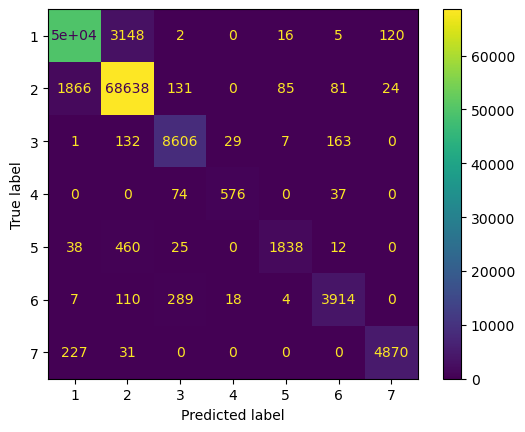

In [45]:
metrics.plot_confusion_matrix(et, X_test, y_test);

# Support Vector Machine

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import LinearSVC

In [34]:
#params = {'C': np.linspace(0.0001, 1, 20)}

svc = LinearSVC()
#gs = GridSearchCV(svc, params, cv=5, n_jobs=-1)
svc.fit(X_train, y_train)

/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [37]:
svc.score(X_test,y_test)

0.650795508526502

In [ ]:
#gs.best_params_

/Users/kamwingsze/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


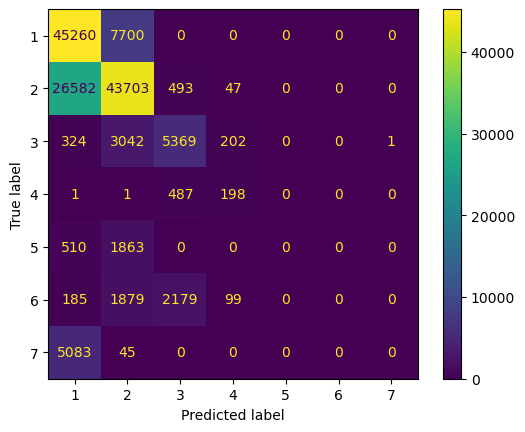

In [36]:
metrics.plot_confusion_matrix(svc, X_test, y_test);